<a href="https://colab.research.google.com/github/MatzeLopi/KIT-2400024/blob/main/DLNN_SS24_Praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1 - Simple Neural Network with Numpy and Pytorch

Note: the praktikums are for your own practice. They will **not be graded**!

You have around one week to work on it. Then we will go over the solutions together in the praktikum time slots!

Remember to make a copy of this notebook to your own Colab. Changes made directly here will not be stored!

In this praktikum, we will build a perceptron model and a Multi-Layer Perceptron (MLP) model **from scratch** with numpy. This is intended to help you understand in details the internal working of neural networks.

Next, we will proceed with building an MLP with [**Pytorch**](https://pytorch.org/get-started/locally/), which is a widely-used framework for building deep learning models.

Our first challenge is solving the **XOR task** that you've seen in the lecture, before we move to a slightly more complex problem, namely the **Iris dataset**.

**Notice**: Whenenver you see an ellipsis `...` or TODO comment, you're supposed to insert code or text answers.

## Excercise 1: XOR Task with Single Perceptron (from scratch)

XOR (exclusive OR) is a logic function that gives 1 as an output when the number of true inputs is odd, otherwise it outputs a 0. Our goal is to model this function using neurons. We'll start with a single neuron.

<center><img src="https://www.xplore-dna.net/pluginfile.php/286/mod_page/content/21/Tabelle%20-%20XOR.png" width="250"/></center>

Let's start with importing some necessary dependencies that we will need throughout the notebook.

In [1]:
import numpy as np

In the first part of this exercise you'll build a perceptron, a single neuron, that takes two binary input values and returns a binary output value.

<center><img src="https://i.stack.imgur.com/eBSki.jpg" width="280" />

<center><img src="" width="280"/>

Perceptron can be seen as a single neuron, mapping an input $\textbf{x}$ to an output $o$ using weights $\textbf{w}$ and a bias $b$. $\cdot$ is the dot product.

$o = \textbf{w}\cdot \textbf{x}+b$

#### Perceptron Update Rule


Perceptron Update Rule is a process that is specific to the training of a single-perceptron model, which we can apply to binary classification problems. This process [has been proven to converge](https://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf) if the data is linearly seperatable and the learning rate is small enough.


Let's use it here to have a first baseline.

For classification problems $0>o$ is interpreted as class 1, and $o<0$ is interpreted as class 0.

For updating the associated weights, we can use the following update rule:

$w_i = w_i + \nabla w_i$

where

$\nabla w_i = \eta(t-o)x_i$

- $t$ is the target
- $o$ is the output
- $\eta$ is the learning rate (a small constant)

### Implementation of a Perceptron

In [2]:
from typing import Callable

def step_function(x) -> int:
    """ Step function that returns 1 if x >= 0, 0 otherwise"""
    return 1 if x >= 0 else 0

class Perceptron():
    """ Implementation of a Perceptron following the above instructions

    Attributes:
        neuron_weights (np.array): Weights of the perceptron
        bias (int): Bias of the perceptron
    """
    def __init__(self):
        """ Initialize the perceptron weights and bias"""
        # TODO:
        # Initialize weights
        # For perceptrons, it's possible to initialize all weights with 0

        self.neuron_weights = np.zeros(2)
        self.bias = 0

    def forward_pass(self, x:np.array,activation_func: Callable = step_function) -> np.array:
        """Forward pass of the perceptron

        Args:
            x (np.array): Input from the previous layer / input data

        Returns:
            np.array: Weighted sum of the input data + bias
        """
        output = sum(self.neuron_weights * x) + self.bias

        return output if activation_func is None else activation_func(output)

    def perceptron_update_rule(self, target:np.array, prediction:np.array, x:np.array, learning_rate=1) -> None:
        """ Perform update of the perceptron following the rule defined above

        Args:
            target (np.array): Target value
            prediction (np.array): Predicted value
            x (np.array): Input data
            learning_rate (int, optional): Learning rate. Defaults to 1.

        Returns:
            None

        """
        new_weights = self.neuron_weights.copy()
        for index, _ in enumerate(self.neuron_weights):

            weight_delta = learning_rate * ((target - prediction) * x[index])
            new_weights[index] += weight_delta


        self.neuron_weights = new_weights

    def train(self, input_data:np.ndarray, targets:np.ndarray):
        """ Training loop for the perceptron
        
        Args:
            input_data: Multi-dimensional array that contains all inputs
            targets: Array that contains all targets
        """
        for data, target in zip(input_data, targets):
            prediction = self.forward_pass(data,step_function)
            print(data, prediction, target)
            self.perceptron_update_rule(target, prediction, data)

    def inference(self, input_data:np.ndarray):
        """ Inference of the perceptron

        Args:
            input_data (_type_): _description_

        Returns:
            _type_: _description_
        """
        # TODO
        outputs = []
        for x in input_data:
            outputs.append(self.forward_pass(x,step_function))

        return np.array(outputs)

### Training

In [3]:
perceptron = Perceptron()

# TODO
# Define input data and targets
input_data = [[0,0],[1,0],[0,1],[1,1]]
targets = [0,1,1,0]

perceptron.train(input_data, targets)

[0, 0] 1 0
[1, 0] 1 1
[0, 1] 1 1
[1, 1] 1 0


### Inference

In [4]:
# TODO
# Test the trained model

predictions = perceptron.inference(input_data)
print(predictions)

[1 0 0 0]


### Evaluation

For evaluation, we will need to consider appropriate metrics. For classification tasks, **accuracy** is one of the most common metrics.

It is defined as:

$\textrm{Accuracy}=\frac{1}{N}\sum_i^N1(y_i=\hat{y}_i)$

where $y$ is an array of our target values, and $\hat{y}$ is an array of our predictions.

For accuracy, if outputs are probabilities, there needs to be a threshold for transforming logit predictions to binary `(0,1)` predictions. We will set this threshold to `0.5`. For our perceptron this is not needed, since we already output binary values, however, we will use the `accuracy` function later on, so the predictions should be considered to be probabilities.

In [44]:
def accuracy(predictions: np.ndarray, targets: np.ndarray, threshold=0.5, one_hot= False) -> float:
    """ Function to evaluate the accuracy of the model

    Args:
        predictions (np.ndarray): Predictions of the model
        targets (np.ndarray): Actual Targets
        threshold (float, optional): Threshold to convert percentage to binary. Defaults to 0.5.
        one_hot (bool, optional): If the targets are one-hot encoded. Defaults to False.

    Returns:
        float: accuracy of the model
    """

    assert len(predictions) == len(targets)
    accuracy_value = 0

    if one_hot:
        for prediction, target in zip(predictions, targets):
            if np.argmax(prediction) == np.argmax(target):
                accuracy_value += 1
            else:
                accuracy_value += 0

    else:
        for prediction, target in zip(predictions, targets):
            if prediction >= threshold:
                prediction = 1
            else:
                prediction = 0
            
            if prediction == target:
                accuracy_value += 1
    

    return accuracy_value / len(targets)

In [6]:

accuracy_value = accuracy(predictions, targets) 
print(accuracy_value)

0.25


You will see that it is not possible to get to 100% accuracy, since XOR is not a linear-separatable problem.

## Excercise 2: XOR Task with MLP (from scratch)

As mentioned in the lecture, unlike a single perceptron, Multi-Layer Perceptron (MLP) can deal with problems that are non-linearly-separatable like XOR.

Now we will try to implement an MLP with 3 hidden layers and a hidden dimension of 3. We will also add an activiation function to introduce nonlinearity in our hidden layers.

<img src="https://i.imgur.com/IUQ05Ol.png">

### Initializing Weights

Xavier intitialization is commonly used to initialize the weights of a network. It is a random uniform distribution that’s bounded between $\pm\frac{\sqrt{6}}{\sqrt{n_i+n_{i+1}}}$ where $n_i$ is the number of incoming network connections, and $n_{i+1}$ is the number of outgoing network connections.

In [7]:
def xavier_initialization(input_size, output_size) -> np.ndarray:
    """ Returns a numpy array of initialized weights """
    bound = np.sqrt(6) / np.sqrt(input_size + output_size)
    weights = np.random.uniform(-bound, bound, size=(input_size, output_size))
    return weights


### Feed-Forward Layer


A feed-forward layer applies a linear transformation to the input $x$ using a weight matrix $\textbf{W}$ and a bias vector $b$:

$z = x\textbf{W}^T+b$

Derivatives:
$$
\dfrac{dz}{dw_i} = x_i
$$

$$
\dfrac{dz}{db} = 1
$$

$$
\dfrac{dz}{dx_i} = w_i
$$

In [8]:
class FeedForwardLayer():
    """ Implementation of a feedforward layer

    Attributes:
        weights (np.ndarray): Weights of the layer. Matrix of shape (input_size, output_size)
        biases (np.ndarray): Biases of the layer. Vector of shape (1, output_size)
    """
    def __init__(self, input_size:int, output_size:int):
        """
        Args:
            input_size (int): Input shape of the layer
            output_size (int): Output of the  
        """
        # initialize weights with Xavier intitialization and biases with zeros
        self.weights = xavier_initialization(input_size, output_size)
        self.biases = np.zeros(output_size)

    def forward(self, x) -> np.ndarray:
        """
        Forward pass

        Args:
            x (np.ndarray): Input to the layer
        """
        self.x = np.array(x)
        # Calculate the output by applying an activation function
        output = np.dot(self.weights.T, self.x) + self.biases
        assert output.shape[0] == self.weights.shape[1]
        return output

    def backward(self, d_values, learning_rate):
        """
        Backpropagation of the layer

        Args:
            d_values (np.ndarray): Derivative of the loss with respect to the output of the layer
            learning_rate (float): Learning rate for gradient descent

        Returns:
            np.ndarray: Derivative of the loss with respect to the input of the layer
        """
        # Compute the derivatives
        d_weights = np.dot(self.x.T, d_values)
        d_biases = np.sum(d_values, axis=0,keepdims=True) 
        d_inputs = np.dot(d_values, self.weights.T)

        # Update the weights and biases
        self.weights -= learning_rate * d_weights
        self.biases -= learning_rate * d_biases

        return d_inputs

**Question**: Why do we need to calculate `d_weights`, `d_biases` and `d_inputs`?

**Answer**: To enable the network to learn using back propagation

### Adding Nonlinearity

For nonlinearity, you should implement Rectified Linear Unit (ReLU) and apply it between the hidden layers to provide nonlinearity to the network.

$$ y = max(0, x) $$

When we examine the ReLU behavior, it looks like it is the combination of two different linear functions. This property makes the training easier yet effective since ReLU does not have any learnable parameters as well as easy to apply because of combination of two simple linear functions.



<center><figure><img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png" width="450"/><figcaption>Graph of the ReLU activation function. <a href="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png">Image source</a></figcaption></figure></center>


Derivative of ReLU:

$\dfrac{dy}{dx} = 1 $ if $x >= 0$

$\dfrac{dy}{dx} = 0 $ if $x < 0$

In [9]:
class ReluActivationFunction():    
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
            

    def backward(self, d_values):
        # Calculate the derivative of the ReLU activation function 
        d_output = np.array([1 if value >= 0 else 0 for value in d_values])
        return d_output



### Backpropagation

The perceptron algorithm can't be generalized to MLP, that's why we will now use **backpropagation**.

<center><img src="https://i.imgur.com/LgBzpYD.png" width="400" /></center>

### Loss Function: Binary Cross Entropy

Backpropagation requires us to have a **loss function**.

$$ L = - (y \times ln(o)+(1-y) \times ln(1-o)) $$

[Derivative](https://www.google.com/search?q=cross+entropy+loss+derivative&sca_esv=6915796dc894fc83&sca_upv=1&rlz=1C5CHFA_enVN752VN752&udm=2&biw=1309&bih=708&sxsrf=ACQVn09fs99X4SFZJk0xmct6PWrepRzpxQ%3A1713181875984&ei=sxQdZuGxO8eE9u8P9oiI6AI&ved=0ahUKEwih15zpk8SFAxVHgv0HHXYEAi0Q4dUDCBA&uact=5&oq=cross+entropy+loss+derivative&gs_lp=Egxnd3Mtd2l6LXNlcnAiHWNyb3NzIGVudHJvcHkgbG9zcyBkZXJpdmF0aXZlMgQQIxgnMgUQABiABDIHEAAYgAQYGEjkBVDRA1jRA3ACeACQAQCYATCgATCqAQExuAEDyAEA-AEBmAIBoAIzmAMAiAYBkgcBMaAHsAM&sclient=gws-wiz-serp#vhid=fKdGq3KS8we6mM&vssid=mosaic):

$$
\dfrac{dL}{do} = \dfrac{-y}{o} + \dfrac{1-y}{1-o}
$$

In [10]:
class BinaryCrossEntropy():

    def forward(self, output, target):

        # TODO
        # implement Binary Cross-Entrops loss function for output, target

        loss = -(target * np.log(output) + (1 - target) * np.log(1 - output))

        # Clip to avoid numerical instability
        loss = np.clip(loss, 1e-7, 1 - 1e-7)

        return loss

    def backward(self, output, target):
        # Calculate the gradient with respect to the output
        return (- target / output) + (1 - target) / (1 - output)

### Sigmoid Activation Function

For a binary classification problem, we can use the sigmoid activation function in the output layer which outputs values in the range of 0 and 1. So, for a positive case (class 1), we can interpret $p_1 = \sigma(o)$ as the probability of that class, while $p_0 = 1 - p_1$ can be seen the probability of the negative case (class 0).

**Sigmoid function**:
$$
\sigma(x) = \dfrac{1}{1 + e^{-x}}
$$

[Derivative](https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/#:~:text=The%20derivative%20of%20the%20sigmoid%20function%20%CF%83(x)%20is%20the,1%E2%88%92%CF%83(x).):
$$
\dfrac{d\sigma}{dx} = \sigma(x)(1-\sigma(x))
$$



In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SigmoidActivationFunction():

    def forward(self, x):
        # TODO
        # implement Sigmoid function for the input_data
        self.x = x
        output = sigmoid(x)
        return output

    def backward(self, d_values):
        # calculate the gradients with help of the derivative
        return sigmoid(d_values) * (1 - sigmoid(d_values))

### Implementation

Now let's put together the components you have implemented so far to our MLP:

In [12]:
class MLP_implementation():
    def __init__(self,
        input_size,
        output_size,
        hidden_layers,
        hidden_layers_size,
        hidden_activation_func,
        output_activation_function,
        loss_function,
    ):
        self.hidden_layers = hidden_layers
        self.hidden_layers_size = hidden_layers_size
        self.hidden_activation_func = hidden_activation_func
        self.loss_function = loss_function
        self.output_activation_function = output_activation_function
        self.layers = []

        # Initialize hidden layers
        for i in range(hidden_layers):
            if i == 0:
                layer = FeedForwardLayer(input_size, hidden_layers_size)
            else:
                layer = FeedForwardLayer(hidden_layers_size, hidden_layers_size)
            self.layers.append(layer)

        # Initialize output layer
        self.output_layer = FeedForwardLayer(hidden_layers_size, output_size)

    def forward_pass(self, x:np.ndarray):
        """_summary_

        Args:
            x (_type_): _description_

        Returns:
            _type_: _description_
        """
        previous_output = x
        current_output = None
        activated_output = None

        for layer in self.layers:
            current_output = layer.forward(previous_output)
            activated_output = self.hidden_activation_func.forward(current_output)
            previous_output = activated_output
        
        current_output = self.output_layer.forward(previous_output)
        output = self.output_activation_function.forward(current_output)

        print(output)
        return output


    def backward_pass(self, d_values, learning_rate):
        # Backpropagate through output layer
        
        d_values = self.output_activation_function.backward(d_values)
        d_values = self.output_layer.backward(d_values, learning_rate)

        # Backpropagate through hidden layers
        for layer in reversed(self.layers):
            d_values = self.hidden_activation_func.backward(d_values)
            d_values = layer.backward(d_values, learning_rate)


    def train(self, input_data, targets, learning_rate=1, epochs=1):
        for epoch in range(epochs):
            print(f"Epoch {epoch+1}/{epochs}")
            total_loss = 0.0
            random_order = np.random.permutation(len(input_data))
            for i in random_order:
                # Forward pass
                output = self.forward_pass(input_data[i])
                
                # Calculate loss
                loss = self.loss_function.forward(output, targets[i])
                total_loss += loss

                # Backward 
                d_values = self.loss_function.backward(output, targets[i])
                self.backward_pass(d_values, learning_rate)

            print(f"Average Loss: {total_loss / len(input_data)}")
            
    def inference(self, input_data):
        output = []
        for data in input_data:
            output.append(self.forward_pass(data))
            
        return np.array(output)


### MLP Inititialization

In [13]:
# Initialize MLP
xor_mlp = MLP_implementation(
    input_size=2,
    output_size=1,
    hidden_layers=3,
    hidden_layers_size=10,
    hidden_activation_func=ReluActivationFunction(),
    output_activation_function=SigmoidActivationFunction(),
    loss_function=BinaryCrossEntropy(),
)



### Training

In [14]:
# TODO
input_data = [[0,0],[1,0],[0,1],[1,1]]
targets = [0,1,1,0]

xor_mlp.train(input_data, targets, learning_rate=0.05, epochs=20000)

Epoch 1/20000
[0.56189481]
[0.49845617]
[0.49713761]
[0.49581385]
Average Loss: [0.66387459]
Epoch 2/20000
[0.49451836]
[0.49318435]
[0.49184517]
[0.49056603]
Average Loss: [0.69590955]
Epoch 3/20000
[0.48929221]
[0.48793815]
[0.48657899]
[0.48532196]
Average Loss: [0.69614159]
Epoch 4/20000
[0.48407028]
[0.48282395]
[0.48144584]
[0.48021082]
Average Loss: [0.69254766]
Epoch 5/20000
[0.47882324]
[0.47743069]
[0.47621319]
[0.47500105]
Average Loss: [0.69431275]
Epoch 6/20000
[0.473595]
[0.47239448]
[0.47097942]
[0.46955951]
Average Loss: [0.69487433]
Epoch 7/20000
[0.4683771]
[0.46694841]
[0.46551497]
[0.46435094]
Average Loss: [0.69817091]
Epoch 8/20000
[0.46319225]
[0.46174652]
[0.46059984]
[0.45945847]
Average Loss: [0.69631598]
Epoch 9/20000
[0.45800083]
[0.45653862]
[0.45541623]
[0.45429912]
Average Loss: [0.69720014]
Epoch 10/20000
[0.45282553]
[0.45172068]
[0.45023936]
[0.44875366]
Average Loss: [0.69819306]
Epoch 11/20000
[0.44766824]
[0.44658802]
[0.44509176]
[0.44359126]
Avera


Average Loss: [0.50016936]
Epoch 415/20000
[0.0003338]
[0.00033053]
[0.00033053]
[0.00033053]
Average Loss: [0.50016606]
Epoch 416/20000
[0.0003273]
[0.0003273]
[0.0003273]
[0.0003241]
Average Loss: [0.50016283]
Epoch 417/20000
[0.00032093]
[0.00032093]
[0.00032093]
[0.00031779]
Average Loss: [0.50015966]
Epoch 418/20000
[0.00031469]
[0.00031161]
[0.00030856]
[0.00030856]
Average Loss: [0.50015655]
Epoch 419/20000
[0.00030856]
[0.00030856]
[0.00030856]
[0.00030555]
Average Loss: [0.5001535]
Epoch 420/20000
[0.00030256]
[0.00030256]
[0.00030256]
[0.0002996]
Average Loss: [0.50015051]
Epoch 421/20000
[0.00029667]
[0.00029377]
[0.00029377]
[0.00029377]
Average Loss: [0.50014758]
Epoch 422/20000
[0.0002909]
[0.0002909]
[0.0002909]
[0.00028805]
Average Loss: [0.50014471]
Epoch 423/20000
[0.00028524]
[0.00028245]
[0.00027968]
[0.00027968]
Average Loss: [0.50014189]
Epoch 424/20000
[0.00027968]
[0.00027968]
[0.00027968]
[0.00027695]
Average Loss: [0.50013913]
Epoch 425/20000
[0.00027424]
[0.

C:\Users\matze\AppData\Local\Temp\ipykernel_11660\45389998.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[9.34562057e-07]
[9.25419777e-07]
[9.25419777e-07]
[9.16366931e-07]
Average Loss: [0.50000041]
Epoch 715/20000
[9.16366931e-07]
[9.16366931e-07]
[9.16366931e-07]
[9.07402644e-07]
Average Loss: [0.50000041]
Epoch 716/20000
[8.98526049e-07]
[8.98526049e-07]
[8.98526049e-07]
[8.89736288e-07]
Average Loss: [0.5000004]
Epoch 717/20000
[8.81032513e-07]
[8.72413881e-07]
[8.72413881e-07]
[8.72413881e-07]
Average Loss: [0.50000039]
Epoch 718/20000
[8.6387956e-07]
[8.55428726e-07]
[8.55428726e-07]
[8.47060561e-07]
Average Loss: [0.50000038]
Epoch 719/20000
[8.47060561e-07]
[8.47060561e-07]
[8.38774257e-07]
[8.38774257e-07]
Average Loss: [0.50000037]
Epoch 720/20000
[8.30569013e-07]
[8.30569013e-07]
[8.22444036e-07]
[8.22444036e-07]
Average Loss: [0.50000036]
Epoch 721/20000
[8.14398541e-07]
[8.0643175e-07]
[7.98542893e-07]
[7.98542893e-07]
Average Loss: [0.50000036]
Epoch 722/20000
[7.98542893e-07]
[7.90731209e-07]
[7.90731209e-07]
[7.82995942e-07]
Average Loss: [0.50000035]
Epoch 723/20000
[7.8

KeyboardInterrupt: 

### Evaluation

In [50]:
# Test and evaluate your new model as in the previous task
# TODO
predictions = xor_mlp.inference(input_data)
print(predictions)
accuracy_value = accuracy(predictions, targets,one_hot=False) 
print(accuracy_value)

[9.41335315e-50]
[9.41335315e-50]
[9.41335315e-50]
[9.41335315e-50]
[[9.41335315e-50]
 [9.41335315e-50]
 [9.41335315e-50]
 [9.41335315e-50]]
0.5


You will now be able to get to 100% accuracy on the XOR task with MLP!!

If you are interested, you can see this [demo](https://lecture-demo.iar.kit.edu/neural-network-demo/) to see how the decision boundaries are found by the MLPs.

## Excercise 3: XOR Task with MLP (using Pytorch)

Everything could have been much easier!

The excercises so far is only for you to undertand the internal details of training a neural network. In practice, we do not have to implement the forward and backward pass of the common function by hand. All can be taken care of by Pytorch!

Look up the Pytorch documentation, and fill in the following blocks of code to build the same MLP with Pytorch:

### Defining the model

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
# Create Graph

input_layer = keras.Input(shape=(2,))
x = layers.Dense(3, activation='relu')(input_layer)
x = layers.Dense(3, activation='relu')(x)
x = layers.Dense(3, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)

# Create Model
model = keras.Model(inputs=input_layer, outputs=output_layer, name = "XOR-MLP")

: 

In [ ]:
model.summary()

: 

In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callback
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs=None):
        if logs.get("accuracy") > 0.99:
            print("\nAccuracy is over 99%")
            self.model.stop_training = True


callback = MyCallback()

# Train Model
history  = model.fit(input_data, targets, epochs=2500, batch_size=1,callbacks=[callback])

: 

### Initializing weights

In [ ]:
# Init weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

# Apply the initialization to the model
xor_mlp_pytorch.apply(init_weights)

: 

### Loss Function: Binary Cross Entropy

In [ ]:
loss_fn = ...

: 

### Optimizer: Stochastic gradient descent

In [ ]:
optimizer = ...

: 

### Training

Below we provide you with a simple training loop.

For the first two epochs, print out the gradient and the values some weights of the network.

**Question**:
- Explain what happens after each step in the training loop.
- Why do we need `optimizer.zero_grad()` here? When should we NOT use it?

**Answer**: ...


In [ ]:
# Define our data
input_data_tensor = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float)
targets_tensor = torch.unsqueeze(
    torch.tensor([0,1,1,0], dtype=torch.float), 1
)

# Training loop
epochs = 2500
for epoch in range(epochs):

    optimizer.zero_grad()
    if epoch < 2:
        print(...)

    output = xor_mlp_pytorch(input_data_tensor)
    if epoch < 2:
        print(...)


    loss = loss_fn(output, targets_tensor)
    if epoch < 2:
        print(...)


    loss.backward()
    if epoch < 2:
        print(...)

    optimizer.step()
    if epoch < 2:
        print(...)


: 

Follow the loss in the backward direction, using its `.grad_fn` attribute too see the computation graph:

In [ ]:
print(...)
print(...)
print(...)


: 

### Evaluation

In [ ]:
predictions = model.predict(input_data)
accuracy_value = accuracy(predictions, targets)
print(accuracy_value)


: 

## Excercise 4: Iris Dataset 🌷 task with MLP (using Pytorch)

Iris is a genus of hundreds of species of flowering plants with showy flowers. The Iris data set consists of 150 samples from three species of Iris which are hard to distinguish (Iris setosa, Iris virginica and Iris versicolor). There are four features from each sample: the length and the width of the sepals and petals, in centimeters. Based on these features, the goal is to predict which species of Iris the sample belongs to.


For this exercise, you need to enable GPUs for this notebook:

- Navigate to "**Edit**" → "**Notebook Settings**"
- Select GPU from the **Hardware Accelerator** drop-down
- You might need to rerun the notebook

Next, we'll check if we can connect to the GPU with PyTorch:

In [16]:
print(tf.test.is_built_with_cuda())

False


###  Loading Dataset

In [82]:
import sklearn

In [83]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
num_classes = 3


Process the data.

**Question**: Is there anything we need to do with the default target? Why?

**Answer**: Ja, one-hot encoding needed

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = tf.one_hot(y_train, num_classes,dtype=tf.int16)
y_test = tf.one_hot(y_test, num_classes,dtype=tf.int16)

### Architecture

We will again use an MLP for this task (with Pytorch).

Intitialize a model with **4 hidden layers** and a **hidden layer size of 768**.

**Question**: Is there any else we should change when building the MLP to fit this task?

**Hint**: it is no longer a binary classification problem

**Answer:** ...

In [85]:
# Defining the model
iris_input_layer = keras.Input(shape=(4,))
x = layers.Dense(768, activation='relu')(iris_input_layer)
x = layers.Dense(768, activation='relu')(x)
x = layers.Dense(768, activation='relu')(x)
x = layers.Dense(768, activation='relu')(x)
output_layer = layers.Dense(3, activation='softmax')(x)

iris_model = keras.Model(inputs=iris_input_layer, outputs=output_layer, name = "Iris-MLP")

iris_model.summary()

Model: "Iris-MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 768)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 768)            │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 768)            │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 768)            │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │         2,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,777,923 (6.78 MB)

 Trainable params: 1,777,923 (6.78 MB)

 Non-trainable params: 0 (0.00 B)

### Training

As you have learnt from the lecture, we can speed up the training process by **batching** and using **GPUs**. Modify the following code for batching and GPUs.

You can also run the code before and after you make changes to see the speed up gain from batching and using GPU.

**Hints**: You can make use of Pytorch's `DataLoader`

**Question**: Report the execution time with and without GPU and batching.

**Answer**: ...

In [95]:
iris_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = iris_model.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9378 - loss: 0.1365  
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.0756 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0470 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.0959 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1637 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1080 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.0714 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9371 - loss: 0.1188 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0553 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.1984 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1033 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### Evaluation

Show the overall accuracy of our model on the test dataset. Use the existing `accuracy` function that you implemented earlier.

In [96]:
# TODO
predictions = iris_model.predict(x_test)
accuracy_value = accuracy(predictions, y_test,one_hot=True)
print(accuracy_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
0.9666666666666667


Print the confusion matrix using `sklearn.metrics.confusion_matrix`.

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


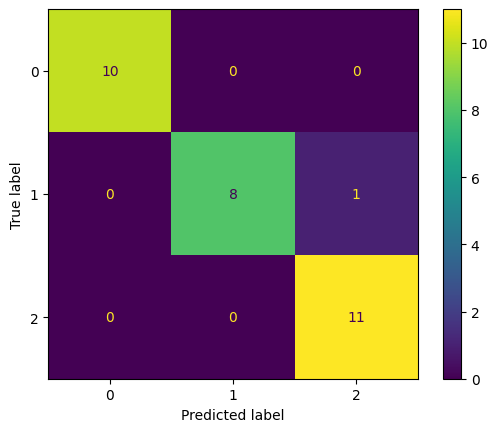

In [98]:
import matplotlib.pyplot as plt
# TODO

y_test_vector = np.argmax(y_test, axis=1)
predictions_vector = np.argmax(predictions, axis=1)

conf_matrix = sklearn.metrics.confusion_matrix(y_test_vector, predictions_vector, labels=[0,1,2])
print(conf_matrix)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1,2])


cm_display.plot()


**Question**: Now also look at the confusion matrix, what can you conclude from it?

**Answer**: False Positive, False negatives etc.

: 